In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json




url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '83c2c545-0db9-4b84-996a-66ab7088b23e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    
    

{'status': {'timestamp': '2024-08-03T11:21:09.034Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 10072}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11621, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option("display.max_column",None)
pd.set_option("display.max_row",None)

In [4]:
df=pd.json_normalize(data["data"])
# df["timestamp"]=pd.to_datetime("now")
df["timestamp"]=pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973502e+07,1.973502e+07,False,NaN,1,NaN,NaN,None,2024-08-03T11:18:00.000Z,61835.564975,4.264222e+10,7.4255,0.182954,-4.552114,-9.146960,6.946085,-10.248347,-2.951194,1.220326e+12,55.4450,1.298547e+12,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:21:11.547016
1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202552e+08,1.202552e+08,True,NaN,2,NaN,NaN,None,2024-08-03T11:18:00.000Z,2991.204026,2.183923e+10,18.9318,0.017252,-5.273865,-8.437078,-5.462679,-20.542145,-4.507371,3.597078e+11,16.3501,3.597078e+11,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:21:11.547016
2,825,Tether USDt,USDT,tether,93454,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145427e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-03T11:18:00.000Z,0.999248,7.398099e+10,16.2905,-0.007310,-0.000009,-0.099852,0.001120,-0.040171,-0.093349,1.144566e+11,5.2025,1.169801e+11,None,2024-08-03T11:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-03 15:21:11.547016
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459372e+08,1.459372e+08,False,NaN,4,NaN,NaN,None,2024-08-03T11:18:00.000Z,540.439382,2.058035e+09,-0.2393,0.169367,-5.759110,-7.818774,2.418253,-15.936511,-7.783824,7.887022e+10,3.5849,7.887022e+10,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:21:11.547016
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.653878e+08,5.815002e+08,True,NaN,5,NaN,NaN,None,2024-08-03T11:18:00.000Z,151.879711,4.512425e+09,7.8356,0.562481,-7.625180,-17.786100,13.268995,-8.155608,3.792979,7.068297e+10,3.2128,8.831808e+10,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:21:11.547016
5,3408,USDC,USDC,usd-coin,21296,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.305983e+10,3.305983e+10,False,NaN,6,NaN,NaN,None,2024-08-03T11:18:00.000Z,1.000163,8.043343e+09,11.7015,-0.012088,0.010735,0.000501,0.017172,0.005798,0.010543,3.306521e+10,1.5029,3.306521e+10,None,2024-08-03T11:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-03 15:21:11.547016
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-03T11:19:00.000Z,0.567821,1.629724e+09,-13.9518,-0.092034,-1.394201,-5.115260,25.412078,8.624118,7.336425,3.179759e+10,1.4453,5.678213e+10,None,2024-08-03T11:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:21:11.547016
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453806e+11,1.453806e+11,True,NaN,8,NaN,NaN,None,2024-08-03T11:19:00.000Z,0.112613,8.868635e+08,7.1699,-0.233225,-4.087041,-16.488518,1.108440,-28.896275,-30.045703,1.637178e+10,0.7442,1.637178e+10,None,2024-08-03T11:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-03 15:21:11.547016
8,11419,Toncoin,TON,toncoin,486,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518061e

In [8]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '83c2c545-0db9-4b84-996a-66ab7088b23e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2=pd.json_normalize(data["data"])
    df["timestamp"]=pd.Timestamp.now()
#     df=df.concat(df2)
#     df=pd.concat([df,df2],ignore_index=True)
    df
    
    if not os.path.isfile(r"C:\Users\Leila\Desktop\Project\Portfolio Project\API automation\API.csv"):
        df.to_csv(r"C:\Users\Leila\Desktop\Project\Portfolio Project\API automation\API.csv", header="column_names")
    else: 
        df.to_csv(r"C:\Users\Leila\Desktop\Project\Portfolio Project\API automation\API.csv", mode="a", header=False)
  

In [9]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed!")
    sleep(60)
exit()


{'status': {'timestamp': '2024-08-12T09:46:16.713Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10033}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

API runner completed!
{'status': {'timestamp': '2024-08-12T09:47:17.997Z', 'error_code': 0, 'error_message': None, 'elapsed': 72, 'credit_count': 1, 'notice': None, 'total_count': 10033}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-ca

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Leila\\Desktop\\Project\\Portfolio Project\\API automation\\API.csv'

In [ ]:
df33=pd.read_csv(r"C:\Users\Leila\Desktop\Project\Portfolio Project\API automation\API.csv")

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973502e+07,1.973502e+07,False,NaN,1,NaN,NaN,None,2024-08-03T11:18:00.000Z,61835.564975,4.264222e+10,7.4255,0.182954,-4.552114,-9.146960,6.946085,-10.248347,-2.951194,1.220326e+12,55.4450,1.298547e+12,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202552e+08,1.202552e+08,True,NaN,2,NaN,NaN,None,2024-08-03T11:18:00.000Z,2991.204026,2.183923e+10,18.9318,0.017252,-5.273865,-8.437078,-5.462679,-20.542145,-4.507371,3.597078e+11,16.3501,3.597078e+11,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
2,825,Tether USDt,USDT,tether,93454,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145427e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-03T11:18:00.000Z,0.999248,7.398099e+10,16.2905,-0.007310,-0.000009,-0.099852,0.001120,-0.040171,-0.093349,1.144566e+11,5.2025,1.169801e+11,None,2024-08-03T11:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 13:47:18.124598
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459372e+08,1.459372e+08,False,NaN,4,NaN,NaN,None,2024-08-03T11:18:00.000Z,540.439382,2.058035e+09,-0.2393,0.169367,-5.759110,-7.818774,2.418253,-15.936511,-7.783824,7.887022e+10,3.5849,7.887022e+10,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.653878e+08,5.815002e+08,True,NaN,5,NaN,NaN,None,2024-08-03T11:18:00.000Z,151.879711,4.512425e+09,7.8356,0.562481,-7.625180,-17.786100,13.268995,-8.155608,3.792979,7.068297e+10,3.2128,8.831808e+10,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
5,3408,USDC,USDC,usd-coin,21296,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.305983e+10,3.305983e+10,False,NaN,6,NaN,NaN,None,2024-08-03T11:18:00.000Z,1.000163,8.043343e+09,11.7015,-0.012088,0.010735,0.000501,0.017172,0.005798,0.010543,3.306521e+10,1.5029,3.306521e+10,None,2024-08-03T11:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 13:47:18.124598
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-03T11:19:00.000Z,0.567821,1.629724e+09,-13.9518,-0.092034,-1.394201,-5.115260,25.412078,8.624118,7.336425,3.179759e+10,1.4453,5.678213e+10,None,2024-08-03T11:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453806e+11,1.453806e+11,True,NaN,8,NaN,NaN,None,2024-08-03T11:19:00.000Z,0.112613,8.868635e+08,7.1699,-0.233225,-4.087041,-16.488518,1.108440,-28.896275,-30.045703,1.637178e+10,0.7442,1.637178e+10,None,2024-08-03T11:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
8,11419,Toncoin,TON,toncoin,486,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518061e

In [13]:
pd.set_option("display.float_format",lambda x:"%5f" % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19735018.000000,19735018.000000,False,NaN,1,NaN,NaN,None,2024-08-03T11:18:00.000Z,61835.564975,42642222538.646690,7.425500,0.182954,-4.552114,-9.146960,6.946085,-10.248347,-2.951194,1220325987815.845947,55.445000,1298546864468.669922,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
1,1027,Ethereum,ETH,ethereum,9184,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120255176.296015,120255176.296015,True,NaN,2,NaN,NaN,None,2024-08-03T11:18:00.000Z,2991.204026,21839234927.247261,18.931800,0.017252,-5.273865,-8.437078,-5.462679,-20.542145,-4.507371,359707767449.673950,16.350100,359707767449.669983,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
2,825,Tether USDt,USDT,tether,93454,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114542666302.877274,117068083203.710236,True,NaN,3,NaN,NaN,None,2024-08-03T11:18:00.000Z,0.999248,73980987096.806595,16.290500,-0.007310,-0.000009,-0.099852,0.001120,-0.040171,-0.093349,114456578743.889313,5.202500,116980097601.110001,None,2024-08-03T11:18:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 13:47:18.124598
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937214.881298,145937214.881298,False,NaN,4,NaN,NaN,None,2024-08-03T11:18:00.000Z,540.439382,2058035200.396816,-0.239300,0.169367,-5.759110,-7.818774,2.418253,-15.936511,-7.783824,78870218168.663864,3.584900,78870218168.660004,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465387831.460609,581500152.359568,True,NaN,5,NaN,NaN,None,2024-08-03T11:18:00.000Z,151.879711,4512425384.755571,7.835600,0.562481,-7.625180,-17.786100,13.268995,-8.155608,3.792979,70682969326.974640,3.212800,88318075064.110001,None,2024-08-03T11:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
5,3408,USDC,USDC,usd-coin,21296,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33059830591.929199,33059830591.929199,False,NaN,6,NaN,NaN,None,2024-08-03T11:18:00.000Z,1.000163,8043343150.211532,11.701500,-0.012088,0.010735,0.000501,0.017172,0.005798,0.010543,33065212987.339424,1.502900,33065212987.340000,None,2024-08-03T11:18:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 13:47:18.124598
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,55999283950.000000,99987385748.000000,False,NaN,7,NaN,NaN,None,2024-08-03T11:19:00.000Z,0.567821,1629723549.882766,-13.951800,-0.092034,-1.394201,-5.115260,25.412078,8.624118,7.336425,31797585556.103527,1.445300,56782128829.529999,None,2024-08-03T11:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 13:47:18.124598
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145380616383.705139,145380616383.705139,True,NaN,8,NaN,NaN,None,2024-08-03T11:19:00.000Z,0.112613,886863482.782808,7.169900,-0.233225,-4.087041,-16.4885

In [21]:
df3=df.groupby("name", sort=False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.273827,-4.552571,-9.155215,7.050382,-10.218379,-2.992353
Ethereum,0.116986,-5.265636,-8.495516,-5.419099,-20.533394,-4.592770
Tether USDt,-0.001297,0.000562,-0.103402,-0.009733,-0.038024,-0.087189
BNB,0.218478,-5.853649,-7.874662,2.508257,-15.950573,-7.827063
Solana,0.687376,-7.681528,-17.725882,13.503511,-8.147790,3.832298
USDC,0.003432,0.017509,0.002592,0.009432,0.013045,0.017761
XRP,0.054279,-1.379351,-5.102751,25.447659,8.673568,7.324239
Dogecoin,-0.059597,-4.035527,-16.390462,1.334163,-28.820714,-30.138742
Toncoin,0.169585,-7.406798,-8.572721,-16.449795,-11.423262,6.837886


In [24]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.273827,-4.552571,-9.155215,7.050382,-10.218379,-2.992353
Ethereum,0.116986,-5.265636,-8.495516,-5.419099,-20.533394,-4.592770
Tether USDt,-0.001297,0.000562,-0.103402,-0.009733,-0.038024,-0.087189
BNB,0.218478,-5.853649,-7.874662,2.508257,-15.950573,-7.827063
Solana,0.687376,-7.681528,-17.725882,13.503511,-8.147790,3.832298
USDC,0.003432,0.017509,0.002592,0.009432,0.013045,0.017761
XRP,0.054279,-1.379351,-5.102751,25.447659,8.673568,7.324239
Dogecoin,-0.059597,-4.035527,-16.390462,1.334163,-28.820714,-30.138742
Toncoin,0.169585,-7.406798,-8.572721,-16.449795,-11.423262,6.837886


In [25]:
df4=df3.stack()

In [26]:
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.273827
              quote.USD.percent_change_24h    -4.552571
              quote.USD.percent_change_7d     -9.155215
              quote.USD.percent_change_30d     7.050382
              quote.USD.percent_change_60d   -10.218379
              quote.USD.percent_change_90d    -2.992353
Ethereum      quote.USD.percent_change_1h      0.116986
              quote.USD.percent_change_24h    -5.265636
              quote.USD.percent_change_7d     -8.495516
              quote.USD.percent_change_30d    -5.419099
              quote.USD.percent_change_60d   -20.533394
              quote.USD.percent_change_90d    -4.592770
Tether USDt   quote.USD.percent_change_1h     -0.001297
              quote.USD.percent_change_24h     0.000562
              quote.USD.percent_change_7d     -0.103402
              quote.USD.percent_change_30d    -0.009733
              quote.USD.percent_change_60d    -0.038024
     

In [27]:
type(df4)

pandas.core.series.Series

In [28]:
df5=df4.to_frame(name="values")
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h    0.273827
             quote.USD.percent_change_24h  -4.552571
             quote.USD.percent_change_7d   -9.155215
             quote.USD.percent_change_30d   7.050382
             quote.USD.percent_change_60d -10.218379
             quote.USD.percent_change_90d  -2.992353
Ethereum     quote.USD.percent_change_1h    0.116986
             quote.USD.percent_change_24h  -5.265636
             quote.USD.percent_change_7d   -8.495516
             quote.USD.percent_change_30d  -5.419099
             quote.USD.percent_change_60d -20.533394
             quote.USD.percent_change_90d  -4.592770
Tether USDt  quote.USD.percent_change_1h   -0.001297
             quote.USD.percent_change_24h   0.000562
             quote.USD.percent_change_7d   -0.103402
             quote.USD.percent_change_30d  -0.009733
             quote.USD.percent_change_60d  -0.038024
             quote.USD.percent_change_90d  -0.087189
BNB          quote.USD.percent_change_1h    0.218478
             quote.USD.percent_change_24h  -5.853649
             quote.USD.percent_change_7d   -7.874662
             quote.USD.percent_change_30d   2.508257
             quote.USD.percent_change_60d -15.950573
             quote.USD.percent_change_90d  -7.827063
Solana       quote.USD.percent_change_1h    0.687376
             quote.USD.percent_change_24h  -7.681528
             quote.USD.percent_change_7d  -17.725882
             quote.USD.percent_change_30d  13.503511
             quote.USD.percent_change_60d  -8.147790
             quote.USD.percent_change_90d   3.832298
USDC         quote.USD.percent_change_1h    0.003432
             quote.USD.percent_change_24h   0.017509
             quote.USD.percent_change_7d    0.002592
             quote.USD.percent_change_30d   0.009432
             quote.USD.percent_change_60d   0.013045
             quote.USD.percent_change_90d   0.017761
XRP          quote.USD.percent_change_1h    0.054279
             quote.USD.percent_change_24h  -1.379351
             quote.USD.percent_change_7d   -5.102751
             quote.USD.percent_change_30d  25.447659
             quote.USD.percent_change_60d   8.673568
             quote.USD.percent_change_90d   7.324239
Dogecoin     quote.USD.percent_change_1h   -0.059597
             quote.USD.percent_change_24h  -4.035527
             quote.USD.percent_change_7d  -16.390462
             quote.USD.percent_change_30d   1.334163
             quote.USD.percent_change_60d -28.820714
             quote.USD.percent_change_90d -30.138742
Toncoin      quote.USD.percent_change_1h    0.169585
             quote.USD.percent_change_24h  -7.406798
             quote.USD.percent_change_7d   -8.572721
             quote.USD.percent_change_30d -16.449795
             quote.USD.percent_change_60d -11.423262
             quote.USD.percent_change_90d   6.837886
Cardano      quote.USD.percent_change_1h    0.125254
             quote.USD.percent_change_24h  -4.208925
             quote.USD.percent_change_7d  -11.406736
             quote.USD.percent_change_30d  -5.801044
             quote.USD.percent_change_60d -19.036160
             quote.USD.percent_change_90d -19.373332
TRON         quote.USD.percent_change_1h   -0.613016
             quote.USD.percent_change_24h  -2.348876
             quote.USD.percent_change_7d   -9.507367
             quote.USD.percent_change_30d  -1.734718
             quote.USD.percent_change_60d   9.480536
             quote.USD.percent_change_90d   2.539025
Avalanche    quote.USD.percent_change_1h    1.284900
             quote.USD.percent_change_24h  -4.454393
             quote.USD.percent_change_7d  -16.279924
             quote.USD.percent_change_30d  -7.531686
             quote.USD.percent_change_60d -31.280762
             quote.USD.percent_change_90d -35.006708
Shiba Inu    quote.USD.percent_change_1h    0.257164
             quote.USD.percent_change_24h  -5.859050
             quote

In [29]:
type(df5)

pandas.core.frame.DataFrame

In [31]:
df5.count()

values    90
dtype: int64

In [37]:
index=pd.Index(range(90))

In [40]:
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.273827
1,Bitcoin,quote.USD.percent_change_24h,-4.552571
2,Bitcoin,quote.USD.percent_change_7d,-9.155215
3,Bitcoin,quote.USD.percent_change_30d,7.050382
4,Bitcoin,quote.USD.percent_change_60d,-10.218379
5,Bitcoin,quote.USD.percent_change_90d,-2.992353
6,Ethereum,quote.USD.percent_change_1h,0.116986
7,Ethereum,quote.USD.percent_change_24h,-5.265636
8,Ethereum,quote.USD.percent_change_7d,-8.495516
9,Ethereum,quote.USD.percent_change_30d,-5.419099


In [81]:
df7=df6.rename(columns={"level_1":"percent_change"})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.273827
1,Bitcoin,quote.USD.percent_change_24h,-4.552571
2,Bitcoin,quote.USD.percent_change_7d,-9.155215
3,Bitcoin,quote.USD.percent_change_30d,7.050382
4,Bitcoin,quote.USD.percent_change_60d,-10.218379
5,Bitcoin,quote.USD.percent_change_90d,-2.992353
6,Ethereum,quote.USD.percent_change_1h,0.116986
7,Ethereum,quote.USD.percent_change_24h,-5.265636
8,Ethereum,quote.USD.percent_change_7d,-8.495516
9,Ethereum,quote.USD.percent_change_30d,-5.419099


In [84]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.273827
1,Bitcoin,24h,-4.552571
2,Bitcoin,7d,-9.155215
3,Bitcoin,30d,7.050382
4,Bitcoin,60d,-10.218379
5,Bitcoin,90d,-2.992353
6,Ethereum,1h,0.116986
7,Ethereum,24h,-5.265636
8,Ethereum,7d,-8.495516
9,Ethereum,30d,-5.419099


In [82]:
print(df7.columns)

Index(['name', 'percent_change', 'values'], dtype='object')


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


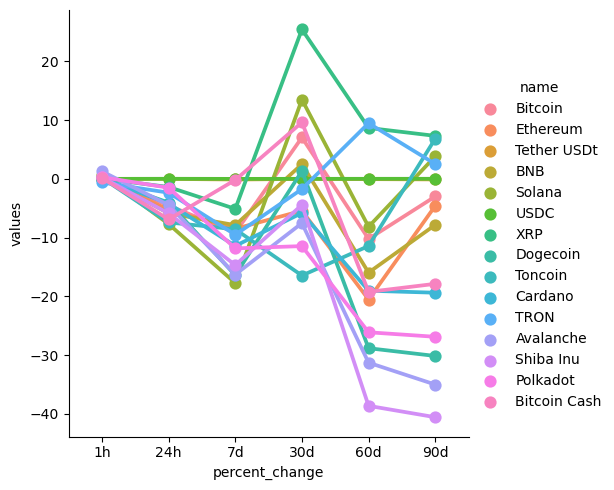

In [86]:
sns.catplot(x="percent_change",y="values",hue="name",data=df7, kind="point")

In [137]:
df8=df[["name","quote.USD.price","timestamp"]]
df8
# df9=df8.query("name=='Bitcoin'")
# df9

,name,quote.USD.price,timestamp
0,Bitcoin,61835.564975,2024-08-12 13:47:18.124598
1,Ethereum,2991.204026,2024-08-12 13:47:18.124598
2,Tether USDt,0.999248,2024-08-12 13:47:18.124598
3,BNB,540.439382,2024-08-12 13:47:18.124598
4,Solana,151.879711,2024-08-12 13:47:18.124598
5,USDC,1.000163,2024-08-12 13:47:18.124598
6,XRP,0.567821,2024-08-12 13:47:18.124598
7,Dogecoin,0.112613,2024-08-12 13:47:18.124598
8,Toncoin,6.144776,2024-08-12 13:47:18.124598
9,Cardano,0.368883,2024-08-12 13:47:18.124598


In [138]:
df9=df8.query("name=='Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,61835.564975,2024-08-12 13:47:18.124598
15,Bitcoin,61835.564975,2024-08-12 13:47:18.124598
30,Bitcoin,61836.167412,2024-08-12 13:47:18.124598
45,Bitcoin,61836.167412,2024-08-12 13:47:18.124598
60,Bitcoin,61849.352828,2024-08-12 13:47:18.124598
75,Bitcoin,61855.139000,2024-08-12 13:47:18.124598
90,Bitcoin,61863.328472,2024-08-12 13:47:18.124598
105,Bitcoin,61866.103880,2024-08-12 13:47:18.124598


<Axes: ylabel='quote.USD.price'>

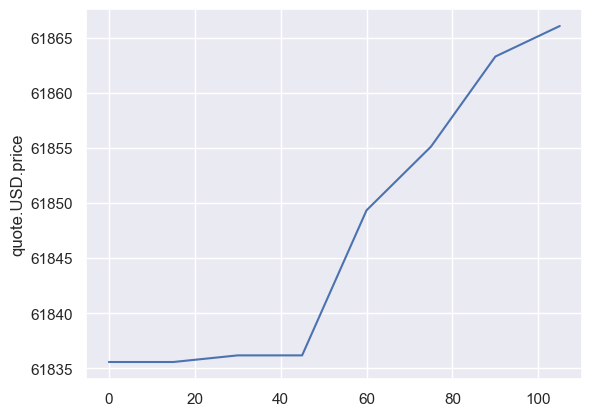

In [147]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=df9.index,y="quote.USD.price",data=df9)